/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


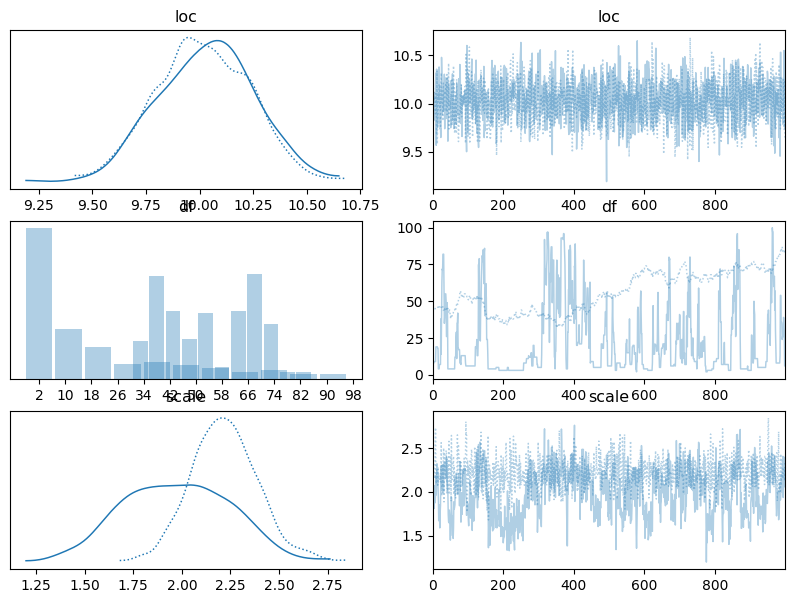

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


Summary:
         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
loc    10.02   0.22    9.62    10.41       0.01     0.00   1711.43   1318.79   
df     39.06  25.85    3.00    75.00      13.83    10.74      4.28     48.77   
scale   2.10   0.26    1.57     2.52       0.09     0.07      9.24     85.74   

       r_hat  
loc     1.00  
df      1.44  
scale   1.16  

Effective Sample Sizes:
        ess_bulk  ess_tail
loc     1711.43   1318.79
df         4.28     48.77
scale      9.24     85.74

R-hat values:
 loc      1.00
df       1.44
scale    1.16
Name: r_hat, dtype: float64

Number of Divergences: 0

Acceptance Rate: 0.8321903303391502


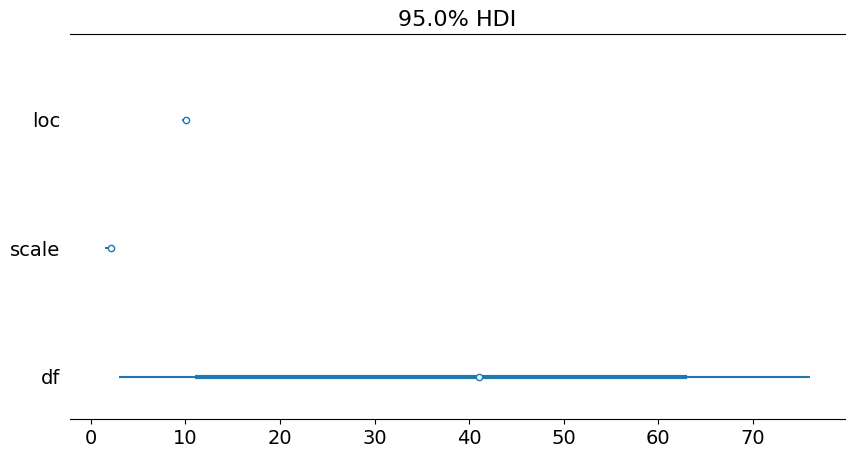

In [1]:
import pymc as pm
import arviz as az
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Parameters for generating the data
mu_0, sigma_0 = 0, 10
n, loc_true, scale_true, df_true = 100, 10, 2, 15

# Generating the data
x = stats.t(df=df_true, loc=loc_true, scale=scale_true).rvs(n)

# Defining the model in PyMC
with pm.Model() as model:
    # Priors
    loc = pm.Normal('loc', mu=0, sigma=10)
    scale = pm.HalfNormal('scale', sigma=5)
    df = pm.DiscreteUniform('df', lower=1, upper=100)

    # Likelihood
    likelihood = pm.StudentT('likelihood', mu=loc, sigma=scale, nu=df, observed=x)

    # Mixed Sampling Strategy: Specify different samplers for continuous and discrete parameters if necessary
    # Here, let's use the default sampler for a straightforward approach, but you can specify as needed
    trace = pm.sample(return_inferencedata=True)

# Posterior analysis with ArviZ
az.plot_trace(trace, figsize=(10, 7))
plt.show()  # Make sure to display the plot if running in a non-interactive environment

summary = az.summary(trace, round_to=2)
print("Summary:\n", summary)

# Diagnostics
# A. Effective Sample Sizes
print("\nEffective Sample Sizes:\n", summary[['ess_bulk', 'ess_tail']])

# B. Chain Convergence Measures
print("\nR-hat values:\n", summary['r_hat'])

# C. Divergences
divergences = trace.sample_stats.diverging.sum().item()
print("\nNumber of Divergences:", divergences)

# D. Acceptance Rates
acceptance_rate = np.mean(trace.sample_stats.acceptance_rate.values)
print("\nAcceptance Rate:", acceptance_rate)

# E. Addressing Potential Warnings
# Note: PyMC automatically prints warnings after sampling if there are issues,
# such as divergences or low effective sample sizes.

# Visualization Enhancements
# Extended Visualizations
fig, ax = plt.subplots(figsize=(10, 5))
az.plot_forest(trace, var_names=["loc", "scale", "df"], combined=True, hdi_prob=0.95, ax=ax)
plt.show()

# Addressing any warnings by adjusting the model or tuning parameters is crucial for reliable inference.
# This step depends on the specific warnings you might encounter.

# Remember, this code assumes a direct continuation of your Bayesian analysis workflow.
# Ensure you have the necessary libraries installed and your Python environment set up to execute this script successfully.



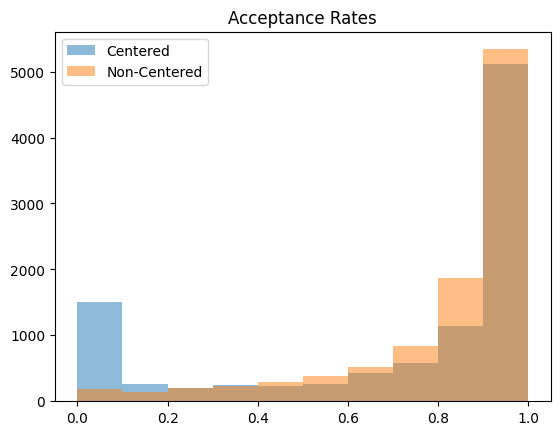

Effective Sample Sizes (Centered):
<xarray.Dataset>
Dimensions:      (theta_dim_0: 8)
Coordinates:
  * theta_dim_0  (theta_dim_0) int64 0 1 2 3 4 5 6 7
Data variables:
    mu           float64 742.8
    theta        (theta_dim_0) float64 2.085e+03 1.674e+03 ... 1.652e+03
    tau          float64 139.2

Effective Sample Sizes (Non-Centered):
<xarray.Dataset>
Dimensions:        (theta_t_dim_0: 8, theta_dim_0: 8)
Coordinates:
  * theta_t_dim_0  (theta_t_dim_0) int64 0 1 2 3 4 5 6 7
  * theta_dim_0    (theta_dim_0) int64 0 1 2 3 4 5 6 7
Data variables:
    mu             float64 1.164e+04
    theta_t        (theta_t_dim_0) float64 1.344e+04 1.238e+04 ... 1.182e+04
    tau            float64 5.77e+03
    theta          (theta_dim_0) float64 1.06e+04 1.245e+04 ... 1.014e+04

R-hat (Centered):
<xarray.Dataset>
Dimensions:      (theta_dim_0: 8)
Coordinates:
  * theta_dim_0  (theta_dim_0) int64 0 1 2 3 4 5 6 7
Data variables:
    mu           float64 1.009
    theta        (theta_dim_0) float64

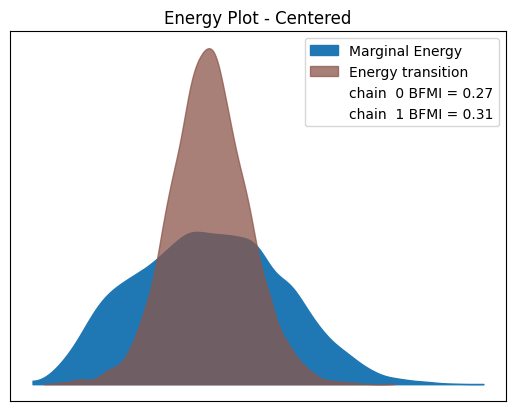

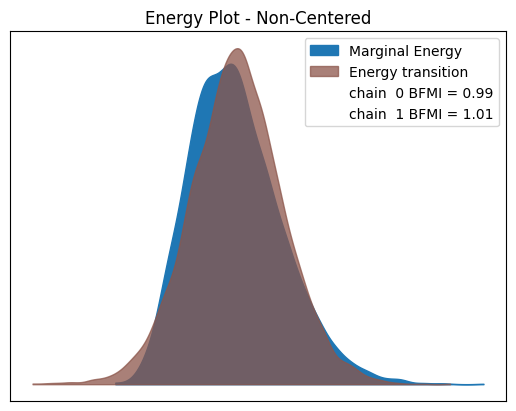

In [2]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import pandas as pd

# Data for the Eight Schools example
J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])

# Centered model specification
with pm.Model() as Centered_eight:
    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)
    theta = pm.Normal("theta", mu=mu, sigma=tau, shape=J)
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)

    # Sampling
    fit_C = pm.sample(5000, chains=2, tune=1000, return_inferencedata=True)

# Non-Centered model specification
with pm.Model() as NonCentered_eight:
    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)
    theta_tilde = pm.Normal("theta_t", mu=0, sigma=1, shape=J)
    theta = pm.Deterministic("theta", mu + tau * theta_tilde)
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)

    # Sampling
    fit_NC = pm.sample(5000, chains=2, tune=1000, return_inferencedata=True)

# Diagnostics and performance metrics
# Acceptance Rates
plt.hist(fit_C.sample_stats.acceptance_rate.values.flatten(), alpha=0.5, label='Centered')
plt.hist(fit_NC.sample_stats.acceptance_rate.values.flatten(), alpha=0.5, label='Non-Centered')
plt.title('Acceptance Rates')
plt.legend()
plt.show()

# Effective Sample Sizes
ess_C = az.ess(fit_C)
ess_NC = az.ess(fit_NC)
print(f"Effective Sample Sizes (Centered):\n{ess_C}\n")
print(f"Effective Sample Sizes (Non-Centered):\n{ess_NC}\n")

# Chain Convergence using r_hat
rhat_C = az.rhat(fit_C)
rhat_NC = az.rhat(fit_NC)
print(f"R-hat (Centered):\n{rhat_C}\n")
print(f"R-hat (Non-Centered):\n{rhat_NC}\n")

# Divergences
div_C = sum(fit_C.sample_stats.diverging.values.flatten())
div_NC = sum(fit_NC.sample_stats.diverging.values.flatten())
print(f"Divergences (Centered): {div_C}")
print(f"Divergences (Non-Centered): {div_NC}")

# Energy Plot for assessing sampler efficiency
az.plot_energy(fit_C)
plt.title("Energy Plot - Centered")
plt.show()

az.plot_energy(fit_NC)
plt.title("Energy Plot - Non-Centered")
plt.show()


## Acceptance Rates Histogram
This histogram compares the acceptance rates of the HMC algorithm for the centered (blue) and non-centered (orange) models. The acceptance rate refers to the proportion of proposed samples in the Markov Chain Monte Carlo (MCMC) that are accepted.

### Observations:

The centered model appears to have a much wider distribution of acceptance rates, with a significant number of rates close to 0, indicating many proposed steps were not accepted.
The non-centered model shows a concentration of acceptance rates close to 1, suggesting that most of the proposed samples were accepted.
The high acceptance rates for the non-centered model are typically indicative of a more efficient sampling process, as the chain is able to take larger steps that are still accepted, leading to faster exploration of the posterior distribution.

## Energy Plot - Centered
The energy plot for the centered model displays the marginal energy distribution and the energy transition distribution. The marginal energy is the distribution of the Hamiltonian energy levels of the samples, and the energy transition distribution reflects the energy levels proposed during sampling.

### Observations:

The marginal and transition energy distributions do not overlap well, which is indicative of poor exploration by the sampler.
The BFMI (Bayesian Fraction of Missing Information) for each chain is below the desired value of 1, indicating potential issues with energy conservation and, by extension, with the sampling process.
Such disparities can suggest that the HMC algorithm had difficulty efficiently exploring the posterior distribution, often caused by the high curvature of the energy landscape in the centered parameterization.

## Energy Plot - Non-Centered
The energy plot for the non-centered model shows the same distributions as for the centered model but for the non-centered parameterization.

### Observations:

The marginal and transition energy distributions are closely aligned, indicating that the sampler transitions between energy levels well.
The BFMI values are around 1 for both chains, suggesting that the sampler's simulated Hamiltonian dynamics conserved energy effectively, which is a good sign of efficient sampling.
This plot indicates that the non-centered parameterization allows the HMC algorithm to more effectively explore the posterior distribution, likely due to a smoother energy landscape with less curvature compared to the centered parameterization.

## Summary
These diagnostics suggest that the non-centered parameterization of the Eight Schools model results in more efficient HMC sampling, with higher acceptance rates and better energy conservation, as evidenced by the closer match between the marginal and transition energy distributions. This typically translates into faster convergence to the target distribution and more reliable posterior inference.